<a href="https://colab.research.google.com/github/DewaGedeR/Apriori-/blob/main/Apriori.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)

from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

In [ ]:
data = pd.read_csv('/content/sample_data/groceries-groceries.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9835 entries, 0 to 9834
Data columns (total 33 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Item(s)  9835 non-null   int64 
 1   Item 1   9835 non-null   object
 2   Item 2   7676 non-null   object
 3   Item 3   6033 non-null   object
 4   Item 4   4734 non-null   object
 5   Item 5   3729 non-null   object
 6   Item 6   2874 non-null   object
 7   Item 7   2229 non-null   object
 8   Item 8   1684 non-null   object
 9   Item 9   1246 non-null   object
 10  Item 10  896 non-null    object
 11  Item 11  650 non-null    object
 12  Item 12  468 non-null    object
 13  Item 13  351 non-null    object
 14  Item 14  273 non-null    object
 15  Item 15  196 non-null    object
 16  Item 16  141 non-null    object
 17  Item 17  95 non-null     object
 18  Item 18  66 non-null     object
 19  Item 19  52 non-null     object
 20  Item 20  38 non-null     object
 21  Item 21  29 non-null     object
 22  

In [ ]:
data = data.drop(columns=['Item(s)'])

In [ ]:
data['items'] = (
    data.astype(str)
    .agg(','.join, axis=1)
    .str.replace('nan', '', regex=False)      # hapus nilai nan
    .str.replace(r',+', ',', regex=True)      # ganti semua koma berulang dengan 1 koma
    .str.strip(',')                           # hapus koma di awal/akhir
)

data = data['items']

In [ ]:
data

,items
0,"citrus fruit,semi-finished bread,margarine,rea..."
1,"tropical fruit,yogurt,coffee"
2,whole milk
3,"pip fruit,yogurt,cream cheese,meat spreads"
4,"other vegetables,whole milk,condensed milk,lon..."
...,...
9830,"sausage,chicken,beef,hamburger meat,citrus fru..."
9831,cooking chocolate
9832,"chicken,citrus fruit,other vegetables,butter,y..."
9833,"semi-finished bread,bottled water,soda,bottled..."


In [ ]:
data['length'] = data.apply(lambda x: len(x.split(',')))

data_size_1 = data[data['length'] == 1]
print(data_size_1)

IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).

In [ ]:
transactions = data.apply(lambda x: [i.strip() for i in x.split(',')])

In [ ]:
tEncode = TransactionEncoder()
tEncode_array = tEncode.fit(transactions).transform(transactions)

data_encoded = pd.DataFrame(tEncode_array, columns=tEncode.columns_)

data_encoded

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,baby food,bags,baking powder,bathroom cleaner,beef,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9830,False,False,False,False,False,False,False,False,False,True,...,False,False,False,True,False,False,False,True,False,False
9831,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9832,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
9833,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
frequent_itemsets = apriori(data_encoded, min_support=0.01, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.033452,(UHT-milk)
1,0.017692,(baking powder)
2,0.052466,(beef)
3,0.033249,(berries)
4,0.026029,(beverages)
...,...,...
328,0.011998,"(root vegetables, tropical fruit, whole milk)"
329,0.014540,"(root vegetables, yogurt, whole milk)"
330,0.010473,"(soda, yogurt, whole milk)"
331,0.015150,"(tropical fruit, yogurt, whole milk)"


In [ ]:
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))

itemsets_size_1 = frequent_itemsets[frequent_itemsets['length'] == 1]
itemsets_size_1

,support,itemsets,length
0,0.033452,(UHT-milk),1
1,0.017692,(baking powder),1
2,0.052466,(beef),1
3,0.033249,(berries),1
4,0.026029,(beverages),1
...,...,...,...
83,0.071683,(whipped/sour cream),1
84,0.042095,(white bread),1
85,0.019014,(white wine),1
86,0.255516,(whole milk),1


In [ ]:
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)
rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']]

,antecedents,consequents,support,confidence,lift
0,"(butter, other vegetables)",(whole milk),0.011490,0.573604,2.244885
1,"(root vegetables, citrus fruit)",(other vegetables),0.010371,0.586207,3.029608
2,"(yogurt, curd)",(whole milk),0.010066,0.582353,2.279125
3,"(domestic eggs, other vegetables)",(whole milk),0.012303,0.552511,2.162336
4,"(pip fruit, other vegetables)",(whole milk),0.013523,0.517510,2.025351
5,"(root vegetables, rolls/buns)",(other vegetables),0.012201,0.502092,2.594890
6,"(root vegetables, tropical fruit)",(other vegetables),0.012303,0.584541,3.020999
7,"(root vegetables, yogurt)",(other vegetables),0.012913,0.500000,2.584078
8,"(whipped/sour cream, other vegetables)",(whole milk),0.014642,0.507042,1.984385
9,"(yogurt, other vegetables)",(whole milk),0.022267,0.512881,2.007235


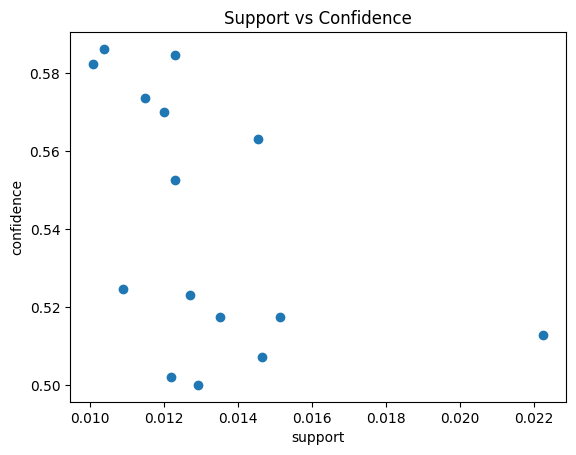

In [ ]:
plt.scatter(rules['support'], rules['confidence'])
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

Berdasarkan scatter plot, dapat disimpulkan beberapa hal berikut:
- rules yang terbentuk memiliki nilai support yang rendah
- nilai confidence untuk tiap rules cukup tinggi berkisar dari 50% hingga 59%

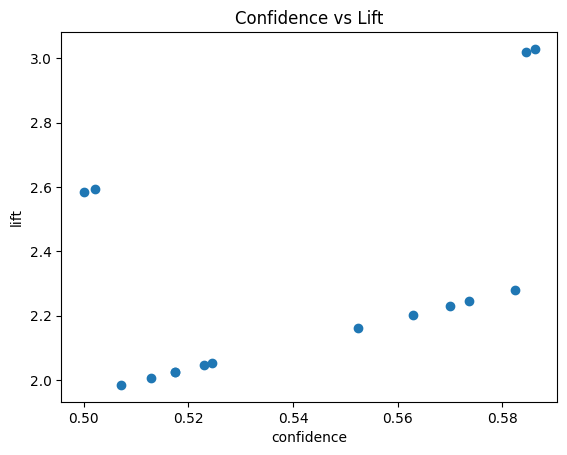

In [ ]:
plt.scatter(rules['confidence'], rules['lift'])
plt.xlabel('confidence')
plt.ylabel('lift')
plt.title('Confidence vs Lift')
plt.show()

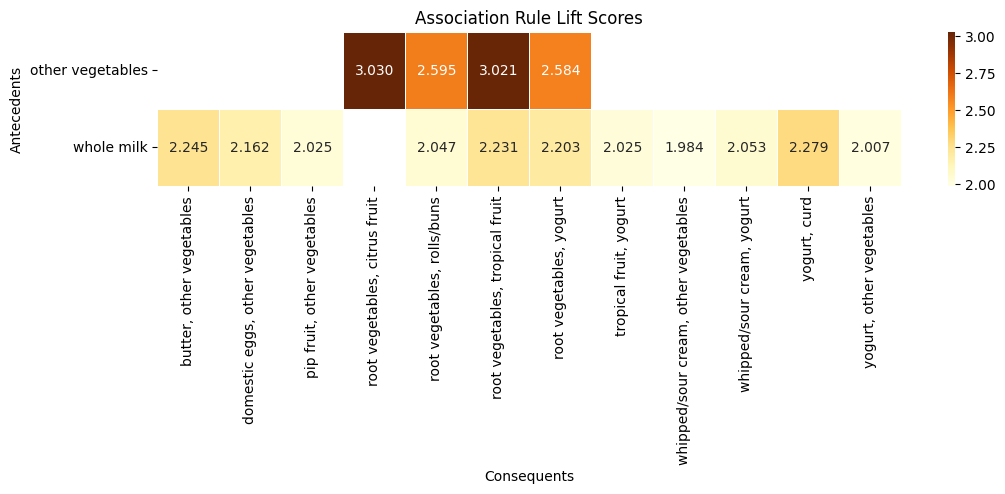

In [ ]:
import seaborn as sns

rules['antecedents_str'] = rules['antecedents'].apply(lambda x: ', '.join(list(x)))
rules['consequents_str'] = rules['consequents'].apply(lambda x: ', '.join(list(x)))

plt.figure(figsize=(12, 2))

pivot_tab = rules.pivot(index='consequents_str',
                        columns='antecedents_str',
                        values='lift')

sns.heatmap(pivot_tab, annot=True, fmt='.3f', linewidths=.7, cmap='YlOrBr')

plt.title('Association Rule Lift Scores')
plt.xlabel('Consequents')
plt.ylabel('Antecedents')
plt.show()

Berdasarkan scatter plot dapat disimpulkan beberapa hal berikut
- semua rules yang terbentuk memiliki lift yang tinggi (di atas 1)
- semua rules memiliki nilai confidence antara 0,5 hingga 0,58
- ada korelasi positif antara Confidence dan Lift pada data